no. data points in first class 53
no. data points in second class 452
no. data points in third class 452


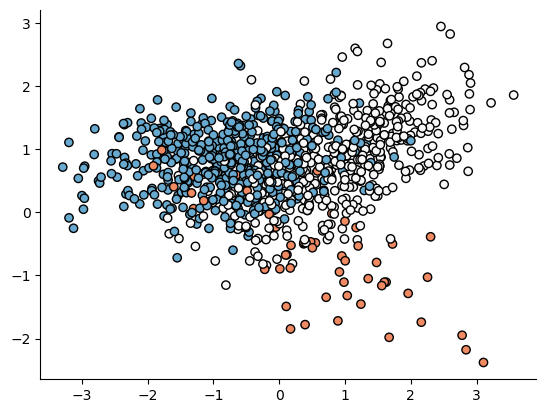

In [7]:
# Do not edit this cell 

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.45, 0.5],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig = plt.Figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()

print(f'no. data points in first class {len(X[np.where(y==0)])}')
print(f'no. data points in second class {len(X[np.where(y==1)])}')
print(f'no. data points in third class {len(X[np.where(y==1)])}')

# Handling Imbalanced Data with SMOTE and SVM

*In this example, we simulate a medical dataset with three disease types, where some diseases are rare. We first train an SVM model and see that it struggles to detect rare diseases. Then we apply SMOTE, a technique that generates synthetic examples to balance the classes, which improves the model’s ability to correctly classify the rare diseases.*\
**Step 1: Create Synthetic Data**\
We create fake data that represents patients with 3 disease types.
Most patients belong to one group, while only a few belong to the other two — this is called imbalanced data.
We then plot this data to visualize how uneven the groups are.\
**Step 2: Split Data into Training and Testing Sets**\
We divide the data into two parts:
	• One part to train the model.
	• One part to test how well the model works.\
**Step 3: Train Model Without Oversampling**\
We use a machine learning model called SVM (Support Vector Machine) to predict disease types without fixing the imbalance.
We check how well it predicts using a confusion matrix (which shows what the model got right and wrong) and a classification report (which shows precision, recall, and F1 score).\
**Step 4: Apply SMOTE Oversampling**\
We fix the imbalance by using SMOTE, a technique that creates synthetic (fake) examples of the rare cases so all groups have roughly the same number of patients.
We plot the balanced data to see how it looks.\
**Step 5: Train Model With Oversampling**\
We train the SVM model again, but this time using the balanced data.
We check the new confusion matrix and classification report.\
**Step 6: Compare Performance Side by Side**\
We create a bar plot to compare the performance (precision, recall, F1 score) before and after oversampling.

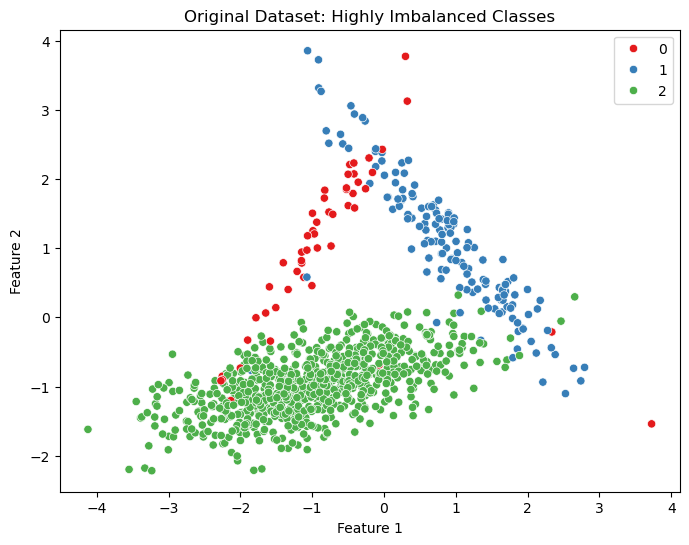

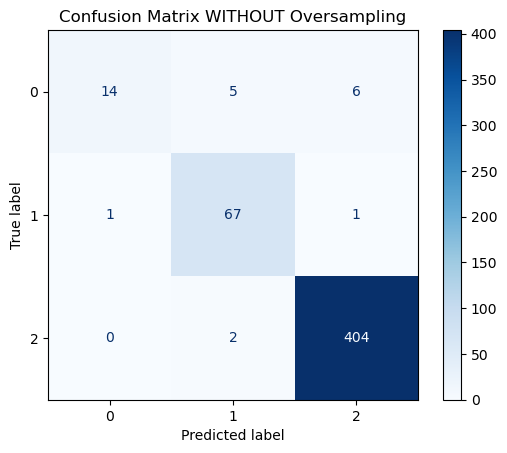


Classification Report WITHOUT Oversampling:

              precision    recall  f1-score   support

         0.0       0.93      0.56      0.70        25
         1.0       0.91      0.97      0.94        69
         2.0       0.98      1.00      0.99       406

    accuracy                           0.97       500
   macro avg       0.94      0.84      0.88       500
weighted avg       0.97      0.97      0.97       500



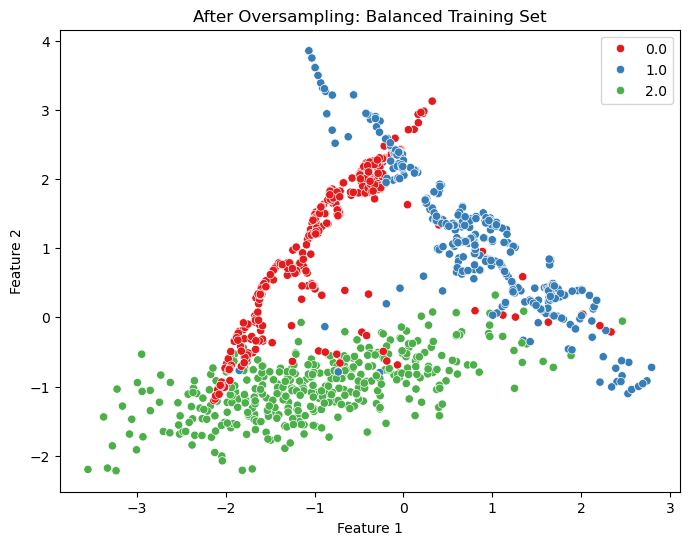

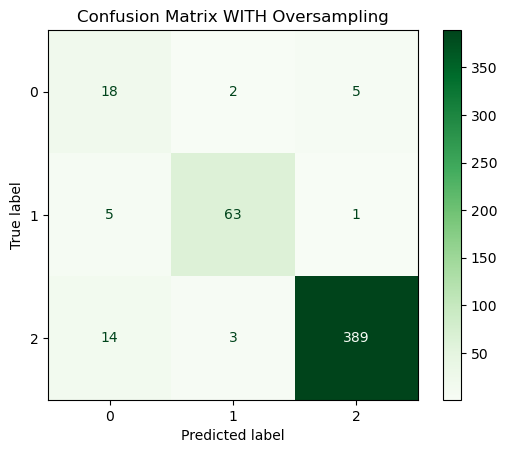


Classification Report WITH Oversampling:

              precision    recall  f1-score   support

         0.0       0.49      0.72      0.58        25
         1.0       0.93      0.91      0.92        69
         2.0       0.98      0.96      0.97       406

    accuracy                           0.94       500
   macro avg       0.80      0.86      0.82       500
weighted avg       0.95      0.94      0.94       500



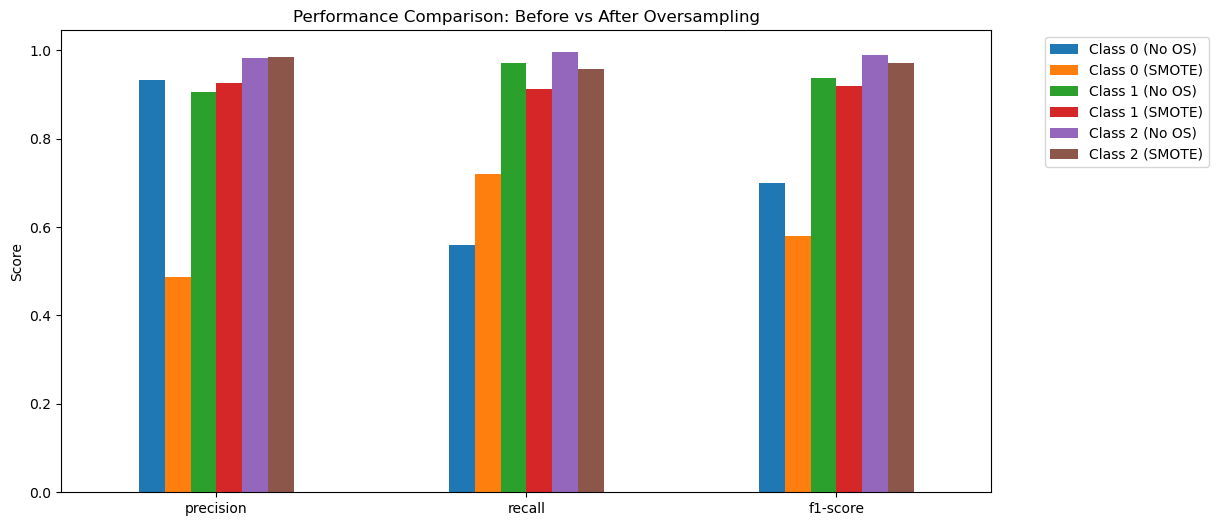

 
- We started with imbalanced data (like having very few sick patients).
- The model struggled to predict the rare classes.
- After using SMOTE, we 'created' synthetic patients to balance the data.
- This made the model much better at spotting the rare cases, as seen in the improved confusion matrix and metrics!



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# 1. Create Synthetic Dataset 
# We create fake data for testing. Imagine this as patients: 3 types of diseases.
X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2,
    n_redundant=0, n_classes=3, weights=[0.05, 0.15, 0.8],
    n_clusters_per_class=1,
    random_state=42
)
# Plot original data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1')
plt.title('Original Dataset: Highly Imbalanced Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 2. Train-Test Split 
# We split our data into training and testing sets. Half for training, half for checking how good the model is.
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42, shuffle=True)
X_train, y_train = train_data[:,:-1], train_data[:,-1]
X_test, y_test = test_data[:,:-1], test_data[:,-1]

# 3. Train SVM without Oversampling
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix WITHOUT Oversampling')
plt.show()

print("\nClassification Report WITHOUT Oversampling:\n")
print(classification_report(y_test, y_pred))

# 4. Apply SMOTE Oversampling 
# Now we balance the classes using SMOTE: it "makes up" new fake patients for the rare classes.
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Show new balanced data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_bal[:,0], y=X_train_bal[:,1], hue=y_train_bal, palette='Set1')
plt.title('After Oversampling: Balanced Training Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 5. Train SVM WITH Oversampling
model_smote = SVC()
model_smote.fit(X_train_bal, y_train_bal)
y_pred_bal = model_smote.predict(X_test)

# Show Confusion Matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)
disp_bal = ConfusionMatrixDisplay(confusion_matrix=cm_bal)
disp_bal.plot(cmap='Greens')
plt.title('Confusion Matrix WITH Oversampling')
plt.show()

print("\nClassification Report WITH Oversampling:\n")
print(classification_report(y_test, y_pred_bal))

# 6. Side-by-side Performance Comparison
metrics = ['precision', 'recall', 'f1-score']
report_no_os = classification_report(y_test, y_pred, output_dict=True)
report_os = classification_report(y_test, y_pred_bal, output_dict=True)

comparison_df = pd.DataFrame({
    'Class 0 (No OS)': [report_no_os['0.0'][m] for m in metrics],
    'Class 0 (SMOTE)': [report_os['0.0'][m] for m in metrics],
    'Class 1 (No OS)': [report_no_os['1.0'][m] for m in metrics],
    'Class 1 (SMOTE)': [report_os['1.0'][m] for m in metrics],
    'Class 2 (No OS)': [report_no_os['2.0'][m] for m in metrics],
    'Class 2 (SMOTE)': [report_os['2.0'][m] for m in metrics],
}, index=metrics)

comparison_df.plot(kind='bar', figsize=(12,6))
plt.title('Performance Comparison: Before vs After Oversampling')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Final Explanation
print(""" 
- We started with imbalanced data (like having very few sick patients).
- The model struggled to predict the rare classes.
- After using SMOTE, we 'created' synthetic patients to balance the data.
- This made the model much better at spotting the rare cases, as seen in the improved confusion matrix and metrics!
""")


# Final Takeaway
• With the imbalanced data, the model struggled to predict rare diseases.\
• After balancing the data with SMOTE, the model improved significantly and did a better job recognizing rare cases.\
• This shows why balancing data is important in real-world problems like healthcare.